# Assignment 2: Predicting Minimum and Maximum PC prices



## 1. Introduction

The goal of this paper is to create a predictive model that estimates the minimal and maximal price of different laptops. This is done on the basis of a dataset that contains the minimum and maximum prices during a time span of three weeks. In order to achieve this, the model must be able to accurately predict both the value of the computer and whether the computer tends to fluctuate in price. 




## 2. Problem Description

In this section, we will first give a short introduction to the dataset. Subsequently, the given features will be interpreted and explored. Finally, a short conclusion will be given to make way for the pre-processing, where more features will be added. 

### The dataset

The dataset is tabular and has around 500 instances and 20 features. Two of these features (“min price” and “max price”) are the output variables.<br>

#### The input variables
The dataset consists of mainly categorical and nominal data. One example is “CPU type” (i3 or i5 or i7 or ...) which consists of discrete values. Another example is ram which is also nominal since it can only take a few values: 2, 4, 3, 6, 8, 12, 16, 32, or 64GB. 
The only numerical input variables is “weight”. Later on, however, a few extra numerical input variables will be engineered.<br>

#### The output variables
The dataset has two target variables for every instance, a minimum and a maximum price. This means that the model will be more complex. It is also worth testing whether a model performs better with a slight change in output variables. Instead of minimum and maximum price, the model could try to predict minimum price and price difference. Summing these results again in the maximum price. These output variables are neither categorical nor nominal, they are numerical (continuous) variables. So, this will already eliminate the use of relatively straight forward binary decision tree modelling.<br>

The test set that was already given to us, does not contain any target values. This means that we still need to split off another additional test set from our training set. This new test set can be used to estimate the accuracy of the model and uncover possible flaws. The data is split in a smart way to ensure that the test set is a good representation of the remaining training data. The validation section will go over this in more detail.

Later on all the adaptation will be done on the whole training set (such as inserting missing values) for convenience. Afterwards the exact same split will be done using the same random_seed = 42

In [ ]:
#### Training Data ####
## Seperating categorical - binary - numerical variables
X_cat = temp_data[['cpu_core','brand','cpu_brand','gpu','gpu_brand','screen_surface','os_details','base_name']]
X_bin = temp_data[['touchscreen','discrete_gpu','detachable_keyboard','threading']]
X_num = temp_data[['id','screen_size','ram','ssd','storage','weight','cpu_GHZ','pixels_x','id']]

Xb = pd.concat([X_cat,X_bin,X_num], axis=1)
Yb = Ya

X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(Xb, Yb, test_size=0.3, random_state=42)


### The features

We are now going to explore the features. First, we will have a glance at the design related features. Secondly, we will take a look at the basic features. Subsequently, we will discuss the CPU and finally we will talk about the GPU. 

#### Design related features
The following features are all related to design, easthetics and the quality aspects of the laptops. Their effects on the price are more difficult to pin down. This, due to it being a result of perceived value, marketing efforts, customer segmentation and others. All those characteristics are more subject to the brand itself. So these variables might be good indicators of price variation, which is an important aspect of the predictive model.  <br>

<b>Screen_size (in inch):</b> The laptop market has relatively standardized screen sizes. Those sizes are 11.6, 13.3, 14, 15.6 and 17.3, with 15.6 being the most common one. This is clearly reflected in the data.<br>

<b>Pixel_x and pixel_y: </b> These two variables have a very strong correlation of 98%. This comes as no surprise as most screens nowadays have a screen ratio of 16:9. The most common format is 1920 Pixels, which is full HD, this is followed by 1366, a typical mid ranged laptop's resolution. The right hand side tail consists of high-end monitors such as 4K.
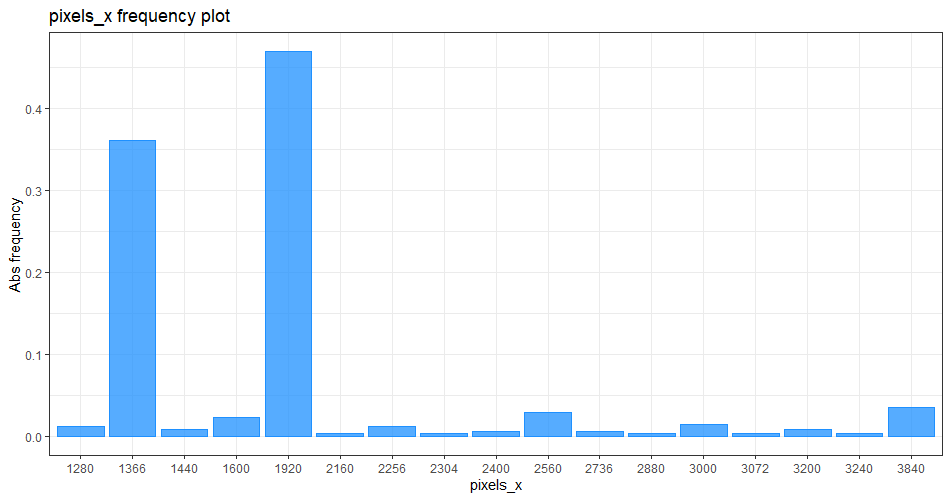
<i>XXXXXXX om grootte aan te passen moet je bij het downloaden de juiste witdth proberen in te schatten. Te klein kan je de assen niet meer onderscheiden XXXXXXXX</i>

<b>Screen_surface:</b> Glossy and matte screen surfaces both have advantages and disadvantages. Their pricing point is also similar. This is reflected in the frequency of their appearance. Except for a few unknown, glossy has a frequency of 55% and matte 45%.

<b>Touchscreen: </b> A more and more common trait with laptops, especially slimmer ones who are competing with tablets as well. This is present in one third of the laptops.

<b>Weight:</b> On the one hand, heavier laptops have more components such as extra storage, a discrete laptop gpu and even a discrete desktop gpu. On the other hand, they use components of higher quality which may be lighter f.e. SSD instead of HDD. The effect of weight is thus difficult to pin, but it is definitely not linear.
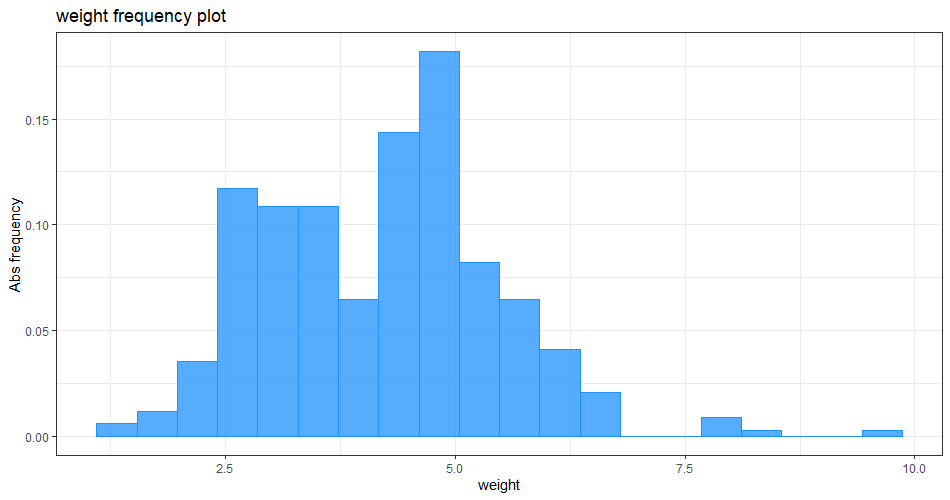

<b>Detachable keyboard: </b> This is a more uncommon trait with laptops. A typical example would be a Microsoft Surface Book, which emulates a tablet when the keyboard is detached. Only 4% of the laptops can detach their keyboard. There is a 28% correlation between touchscreen and detachable keyboard. Not surprisingly, every laptop with a detachable keyboard must have a touchscreen. The same cannot be said for the oposite though.

<b>Brand:</b> This gives a nice overview of the laptop market share. Note the brands such as Jumper and RCA. These are uncommon brands in the belgian market. They also make their own core and graphical processors, but more on that later.
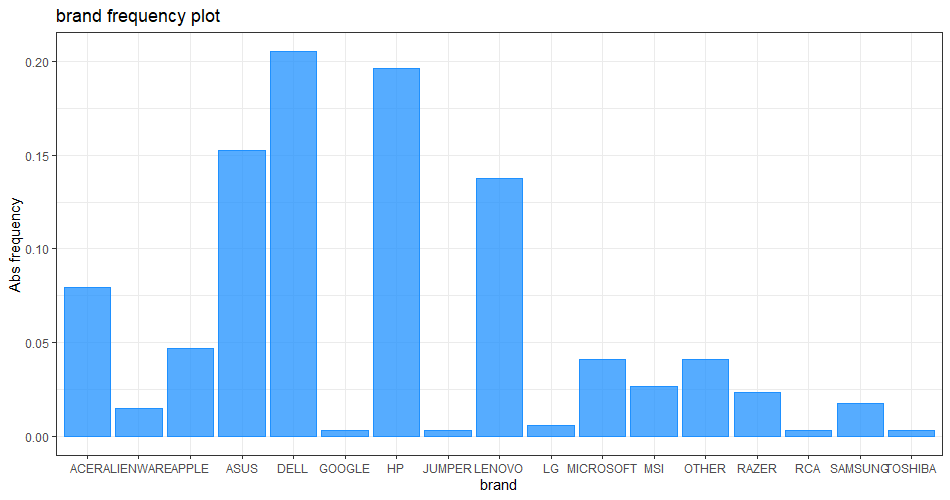


#### Basic Features
The following features are components of a computer that are not made by the laptops brand itself, but they are outscourced, made by other companies and used by all brands. This results into a more predicatable pricing of those components. E.g. If you are looking at two laptops one with 128GB SSD and the other with 256GB and all other specifications identical, the difference in price will be the price difference of these two SSD's plus the companies mark-up.<br>

<b>RAM:</b> Short term memory comes in very standardised numbers (a power of 2) from 2 up to 64 with a few exceptions. As reflected by the graph the most common configuration is with 8GB (38%). Simpeler computer have 4 GB (25%) and computers oriented towards gaming or video editing often have 16GB (24%). All other configuarations are below 5%.

<b>SSD:</b> Solid State Drive is a newer type of storage partially complementing the older HDD but also replacing them. The latter occurse often with laptops. Similar to RAM they usually come in a power of 2 as well. Note that 8 to 128GB configurations are typical for Chromebooks, where 128 and higher configurations are typical for other laptops. Solid state drives are becoming the norm as we speak. Because of their rising popularity and production, they are becoming cheaper every year. This variable may therefore also account for some price variation. Nevertheless, around 30% of the laptops do not have an SSD.
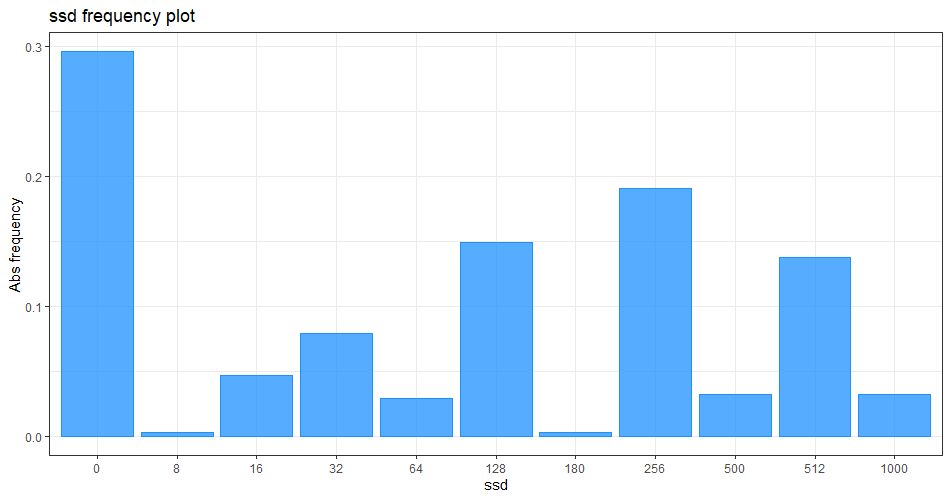

<b>Storage:</b> Consists of both the slower HDD and the faster SSD. There are many possible configurations. Usually the low-end market only has HDD's. The mid market tends to have SSD's only and the high-end market often has both. The correlation betwoon those two reaches 25%. This is because they carry partially similar information and they are both storing components.

<i> correlation is tussen HDD en SSD? maar moet de uitleg niet zijn dat 25% van de dataset van de high end market is? Want daar zijn ze beide op aanwezig? -> deels klopt dit wel, maar de feature hier is storage = hdd + ssd. Dus er zijn ook veel gevallen waar de pc geen hdd heeft, maar enkel bv 256 SSD. In voorbeeld is SSD = 256 = Storage. De 2 features zijn gelijk, dus deze dragen ook bij tot de totale correlatie. In de high end zou het kunnen dat SSD = 256 en Storage = 1256 omdat de laptop ook 1000 HDD heeft. Ah we hebben over het hoofd gezien dat we een feature HDD konden maken... maar die zou wss niet veel waarde toevoegen aangezien we die info toch al indirect hadden </i>

<b>OS:</b> The operating system market is strongly dominated by Windows. Apple has its own MACOS and Chromebooks have their own Chrome OS. There are only a few tiny other players.

<b>OS details:</b> Specifies the OS in more detail. The distribution is very similar to the OS itself as OS is a higher level view of this variable.

#### CPU features
Because of the great importance of the CPUs in computers and the extensive feature engineering we will discuss later, CPUs get their own paragraph. Similar to the basic features, CPUs are also outsourced.<br>

<b>cpu:</b> Specifies the brand and the series. Intel is clearly the market leader with its well known i3, i5 and i7 series. A relatively small, yet imortant competitor is AMD.

<b>cpu_details:</b> All specifications of the CPU are contained in this variable. Unfortunatly, having all this information in only one string is not ideal and makes the variable a high-level categorical. In other words, the variable has too many classes. To deal with classes most models create dummies which is an extra parameter for almost every class. These high-level categoricals will introduce too many parameters in the model for relatively little information gain. In the pre-processing section, we will certainly come back to this variable. 

#### GPU features
The GPU gets a similar treatment as the CPU. All CPU's have a basic GPU included in their chip. But it is important to know that not all laptops have a dedicated GPU. A consumer that wishes to do more advanced, graphical demanding activities such as gaming, video editing and parallel calculations, can decide to buy a laptop with a dedicated/discrete GPU. This component is up to the more demaning tasks.<br>

<b>discrete gpu:</b> This indicator will confirm the precence of a dedicated GPU (30%). 

<b>gpu:</b> This feature will specify the GPU used. In case no discrete GPU is present, the GPU in the CPU will be specified. Otherwise, the seperate graphical processor will be specified. This is also a high-level categorical feature.

### Conclusion
So, we have given an overview of the dataset. We have also introduced some basic components and some intuitions behind the components. But at this stage, we haven't got enough features yet. Moreover, there are some features that aren't useful in their current form such as the high categorical features. We will discuss how we will preprocess the dataset in the next paragraph.


## 3. Preprocessing

Preprocessing is critically important to extract useful features from the input data and other sources. Below some of the possibly useful features are determined.

### Extracting useful features: 
<br>
There are a few features in the data set that contain interesting data, but are very detailed. Splitting them up into multiple features might prove useful.
<br>

In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
import regex as re
    
def make_uppercase(dataset):
    #Make a datafram uppercase
    return dataset.apply(lambda x: x.astype(str).str.upper())

def validateString(s):
    letter_flag = False
    number_flag = False
    for i in s:
        if i.isalpha():
            letter_flag = True
        if i.isdigit():
            number_flag = True
    return letter_flag, number_flag

ModuleNotFoundError: No module named 'fuzzywuzzy'

#### Design related features
<br>
The first extracted feature is "pc_name" from "base_name". This is the most diffult feature to extract because the resulting feature still contains rather many possible values. The idea is to single out the brand and the series of the computer, e.g.: Dell inspiron, Dell lattitude or Dell XPS. Although, you could buy a lattitude or an XPS with almost identical components, such as cpu, gpu, ssd, memory, storage,... , there is still a significant price difference and possible price volatitlity because of the build quality, design and warranties included. This feature tries to capture those differences. Although it has much potential, this variable might remain a too high-level categorical.

In [ ]:
def get_name(dataset):      
    length = len(dataset['base_name'])
    dataset['pc_name'] = np.NaN
    for i in range(0,length):
        string = ''
        for k in dataset['base_name'][i].split(' '):
            k = k.replace('-',' ')
            letter_flag, number_flag = validateString(k)
            if (letter_flag == True and number_flag == True) or (letter_flag == False and number_flag == True):
                break
            else:
                string = string + ' ' + k
        dataset['pc_name'][i] = string[1:]
                
    return dataset

#### Basic features
<br>
From "OS_details" OS_details_2 was extracted. This new variable, however, contained identical information as the original feature and is thus not used any further.
<br>

In [ ]:
def extract_os_details(dataset):
    #Extracting only the os details
    length = len(dataset['os_details'])
    new_os = list()
    for i in range(0,length):
        if dataset['os_details'][i][0] == 'W':
            new_os.append(dataset['os_details'][i][8:])
        elif dataset['os_details'][i][0] == 'C':
            new_os.append(dataset['os_details'][i][0:])
        elif dataset['os_details'][i][0] == 'O':
            new_os.append(dataset['os_details'][i][5:])
        elif dataset['os_details'][i][0] == 'M':
            new_os.append(dataset['os_details'][i][6:])
        elif dataset['os_details'][i][0] == 'A':
            new_os.append(dataset['os_details'][i][8:])
        else:
            new_os.append(dataset['os_details'][i][0:])
    
    dataset['os_details_2'] = new_os
    return dataset

#### CPU features 
<br>
Another important feature to extract data from is "cpu_details". This feature on itself is not very useful because it has a vast amount of possible values. In other words, it is a high-level categorical. Parts of the cpu's details, however, would yield very consistent, lower level categoricals. E.g. Two values for this feature are:<br>
INTEL CORE I7-8750H 2.2 GHZ (8TH GEN COFFEE LAKE HEXA-CORE WITH HYPER-THREADING)<br>
AMD RYZEN 3 2200U 2.5 GHZ (DUAL-CORE WITH SIMULTANEOUS MULTI-THREADING)<br>
The first two parts, cpu's brand and cpu's type, will be captured in following paragraph. Other extractable features are the processor code, GHz, generation, cpu architecture, number of cores and threading configuration. Unfortunately, generation and cpu architecture are only available to Intel processors. Extracting those, will result in too many missing values. The features "cpu_GHZ", "cpu_core" and "threading" are extracted. For the latter it is interesting to note that although there are three possible classes (no threading, hyper threading and multi threading) the new  feature is binary: threading yes (70%) or no (30%). This because it turns out that hyper threading is patented by Intel, therefore AMD calls their very similar technology multi threading. As we already have an Intel or AMD feature, making a distinction between the two threadings would not add any new information. Surprisingly, almost three quarters of the processors have threading. In the background, "cpu_details_2" is extracted as well. More on this in the "External data" part.

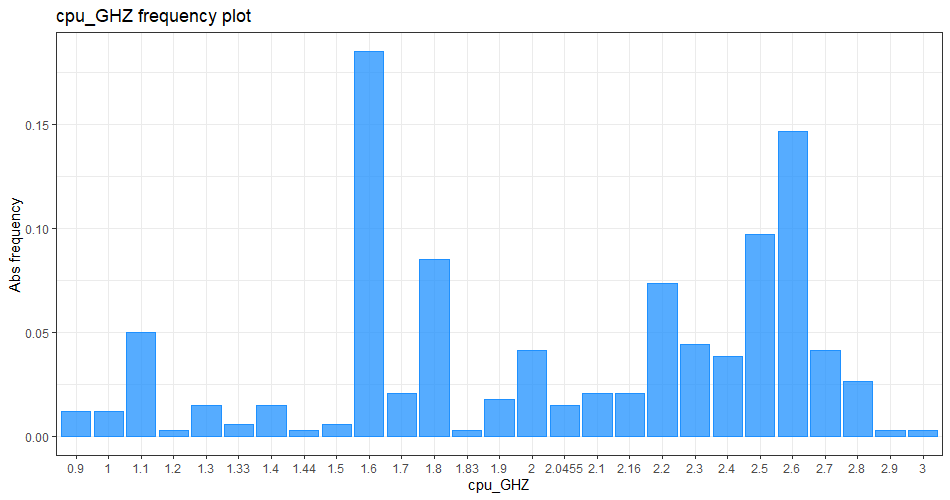
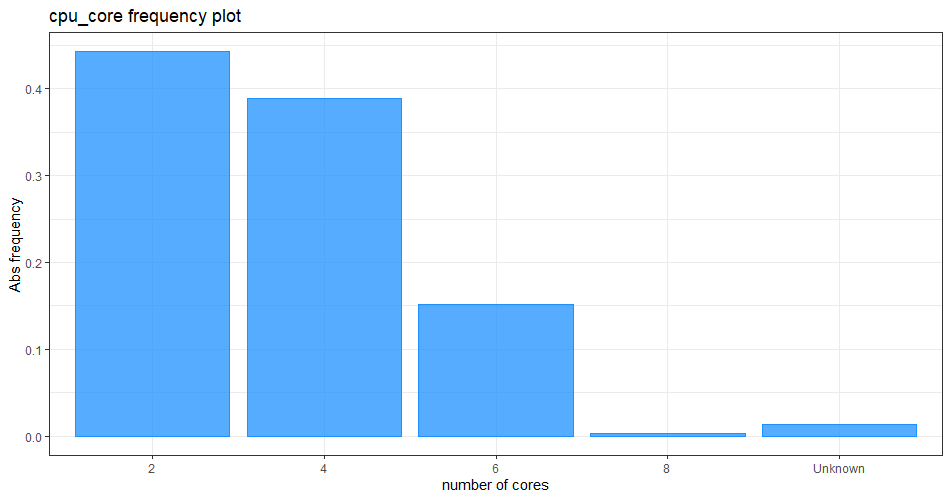

<br>

In [ ]:
def extract_cpu_type_name(dataset):
    #Get cpu number in extra column
    length = len(dataset['cpu_details'])
    cpu_details_2 = list()
    for i in range(0, length):
        if pd.notna(dataset['cpu_details'][i]) and 'GHZ' in dataset['cpu_details'][i].split(' '):
            if '-' in dataset['cpu_details'][i].split(' ')[dataset['cpu_details'][i].split(' ').index('GHZ')-2] :
                cpu_details_2.append(dataset['cpu_details'][i].split(' ')[dataset['cpu_details'][i].split(' ').index('GHZ')-2].split('-')[1])
            else:
                cpu_details_2.append(dataset['cpu_details'][i].split(' ')[dataset['cpu_details'][i].split(' ').index('GHZ')-2])
        else:
            cpu_details_2.append(np.nan)
            
    dataset['cpu_details_2'] = cpu_details_2
    return dataset
    
def extract_cpu_ghz(dataset):
    #Get cpu GHZ in extra column
    length = len(dataset['cpu_details'])        
    cpu_GHZ = list()
    for i in range(0, length):
        if 'GHZ' in dataset['cpu_details'][i].split(' '):
            GHZ = dataset['cpu_details'][i].split(' ')[dataset['cpu_details'][i].split(' ').index('GHZ')-1]
            cpu_GHZ.append(GHZ)
        else:
            cpu_GHZ.append(np.NaN)
    
    dataset['cpu_GHZ'] = cpu_GHZ
    return dataset

def get_cpu_core(dataset):
    length = len(dataset['cpu_details'])
    dataset['cpu_core'] = np.NaN
    for i in range(0, length):
        for k in dataset['cpu_details'][i].split(' '):
            if re.search('.+-CORE', k):
                k = k.replace('(','')
                k = k.replace(')','')
                dataset['cpu_core'][i] = k
            else:
                continue
    
    return dataset
    
def get_threading(dataset):
    length = len(dataset['cpu_details'])
    dataset['threading'] = np.NaN
    for i in range(0, length):
        cpu = dataset['cpu_details'][i]
        cpu = cpu.replace('(','')
        cpu = cpu.replace(')','')
        if 'MULTI-THREADING' in cpu:
            dataset['threading'][i] = 1
        elif 'HYPER-THREADING' in cpu:
            dataset['threading'][i] = 1
        else:
            dataset['threading'][i] = 0
        
    return dataset

#### CPU and GPU features

<br>
It might be beneficial to turn the values for "cpu" into two seperate features "cpu_brand" and "cpu_type_name".
Although "cpu_type_name" contains almost identical information as the original feature, "cpu_brand" is more high level with fewer possible values. "gpu" Gets the same treatment.
E.g. Two possible values for "cpu" are:<br>
INTEL CORE I7<br>
AMD A6<br>
Then creating seperate features results in:<br>
INTEL & CORE I7<br>
AMD & A6<br>

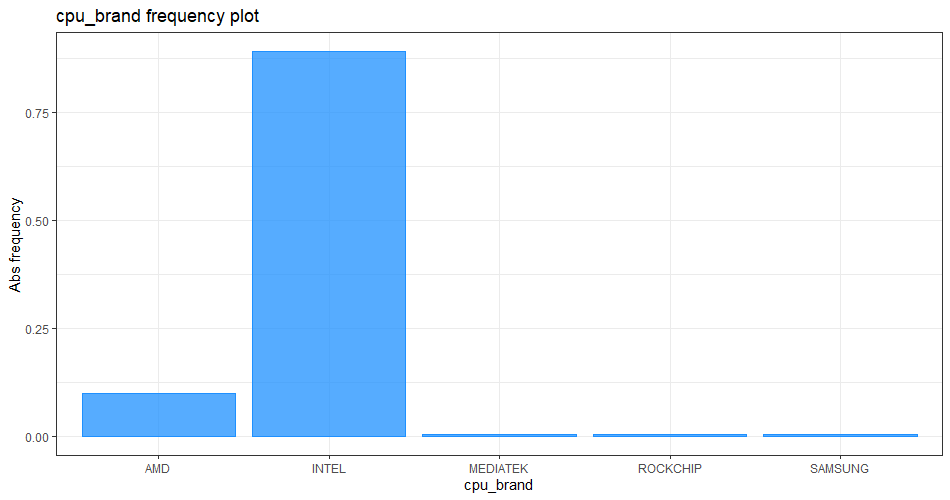
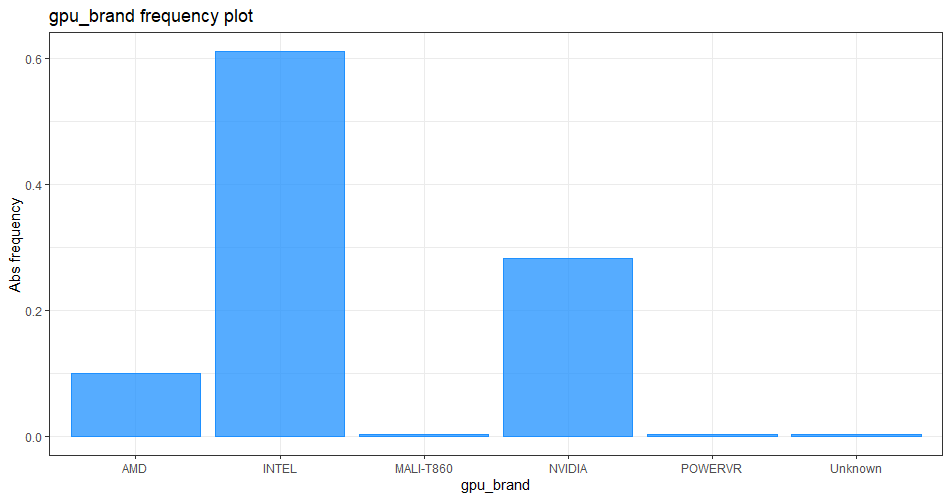

As mentioned before when looking at the brands, there are some uncommon CPU's and GPU's. One part is from the uncommon brands that make their own processors. Another part is from a few specific Chromebooks. Note that if an instance has an uncommon cpu, it will most likely have an uncommon gpu and vice versa.

<br>
In part 5 about our model, more detail will be given regarding the features used in the final model.

<br>

In [ ]:
def split_cpu(dataset):
    ## Split up the cpu column
    # Create 2 new columns: CPU Brand and CPU Type
    new_cpu = dataset['cpu'].str.split(' ', n=1, expand=True)
    dataset['cpu_brand'] = new_cpu[0]
    dataset['cpu_type_name'] = new_cpu[1]
    return dataset
    

def split_gpu(dataset):
    ## Split up the gpu column
    # Create 2 new columns: GPU Brand and GPU type
    new_gpu = dataset['gpu'].str.split(' ', n=1, expand=True)
    dataset['gpu_brand'] = new_gpu[0]
    dataset['gpu_type'] = new_gpu[1]
    return dataset

### External data 
<br>
As mentioned before, most features are categorical. On top of that, some of them have a wide range of possible values. These are called high-level categoricals. There are two very important components to a computer for which this is the case: cpu and gpu. They are key drivers in the price of any computer and making them more compareable and robust would be a great improvement.<br>

PassMark Software is a website that conducts a large amount of benchmarks and performance tests on WiFi conncection, software, hardware,... Althoug it is not ideal, with some basic Excell skills you can easily convert the data from the website to a neat table with the cpu name and its performance. Therefore cpu_benchmark and gpu_benchmark are added to the data table by using respectively cpu_details_2 and gpu_type.

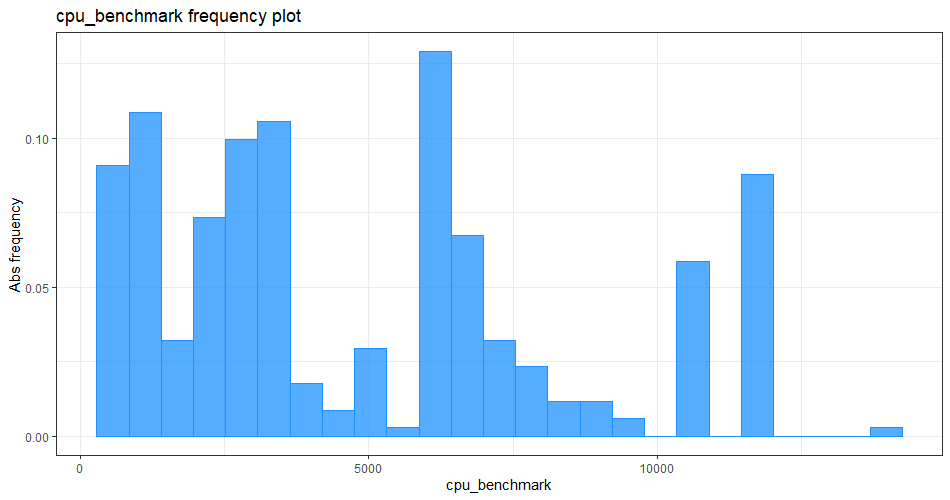
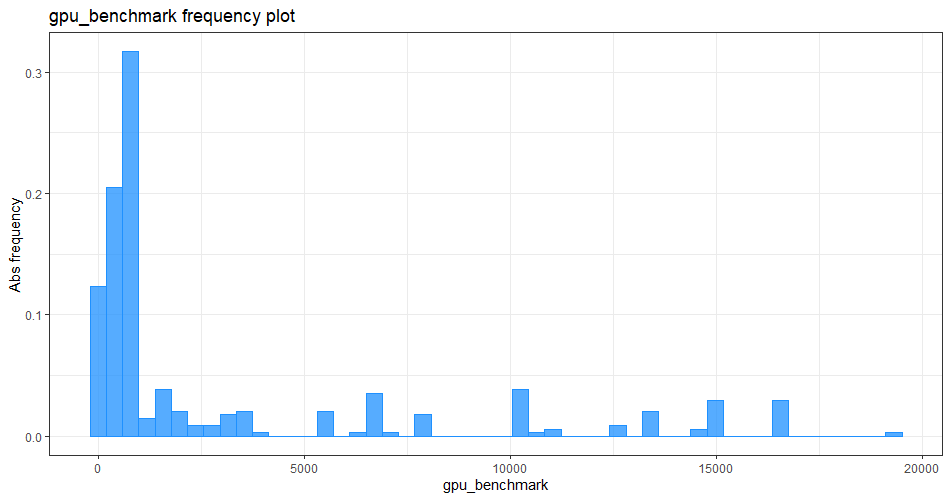

The GPU benchmark graph is not surprising if you remember that only 30% of the laptops sold have a dedicated GPU. Indeed, 70% of the laptops are piled up on the left hand side with less processing power. The tail consists of increasingly powerfull processors. Local maxima might be due to certain GPU's being very popular.
<br>

In [ ]:
def link_cpu_to_benchmark_score(dataset, benchmarkset):
    # Linking cpu benchmark results to dataframe
    dataset['cpu_benchmark'] = np.NaN
    for i in range(len(dataset['cpu_details_2'])):
        for j in range(len(benchmarkset['cpu name'])):
            if str(dataset['cpu_details_2'][i]) in str(benchmarkset['cpu name'][j]):
                dataset['cpu_benchmark'][i] = benchmarkset['passmark cpu score'][j]
       
    return dataset

def link_gpu_to_benchmark_score(dataset, benchmarkset):
    # Linking gpu benchmark results to dataframe
    dataset['gpu_benchmark'] = np.NaN
    for i in range(len(dataset['gpu_type'])):
        for j in range(len(benchmarkset['gpu name'])):
            if str(dataset['gpu_type'][i]) == str(benchmarkset['gpu name'][j]):
                dataset['gpu_benchmark'][i] = benchmarkset['gpu passmark score'][j]
            else:
                continue
        if pd.isna(dataset['gpu_benchmark'][i]):
            for k in range(len(benchmarkset['gpu name'])):
                if fuzz.token_set_ratio(benchmarkset['gpu name'][k], dataset['gpu_type'][i]) > 90:
                    dataset['gpu_benchmark'][i] = benchmarkset['gpu passmark score'][k]
                else:
                    continue
                
    return dataset

### Overview of extracted features!
<br>
Here you can find an overview of all extracted features and the features they were derived from. This will also be very usefull when looking at missing values in the next section. Whenever a "mother" variable is missing, the derived variable will not be defined either.<br>
<br>

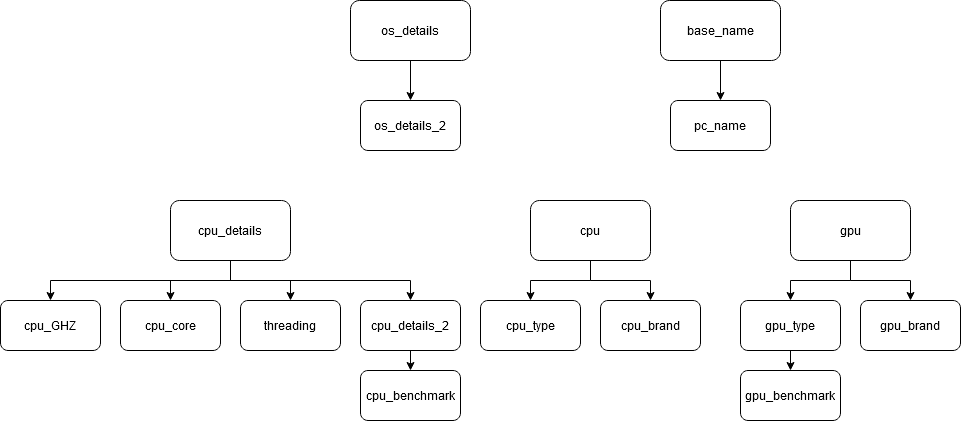

<br>
Not all correlations (Pearson) and associations (Cramer V) have been mentioned throughout the previous sections. This is because most of them just confirm the following: The laptop customers can be divided into a few segments: average usage, student/work usage, gamers,... In these segments themselves customers can have different purchasing power and within these two dimensions you can typically find similar components. 

In the next snippet of code all the previous definitions are put together

In [ ]:
def main():
    
    #Load the 3 necessary datafiles 
    data_train = pd.read_csv('/Users/Simon/Documents/GitHub/adana123/train.csv', keep_default_na=True)
    data_test = pd.read_csv('/Users/Simon/Documents/GitHub/adana123/test.csv', keep_default_na=True)
    cpu_data = pd.read_csv('/Users/Simon/Documents/GitHub/adana123/CPU_Benchmark.csv', sep=';')
    gpu_data = pd.read_csv('/Users/Simon/Documents/GitHub/adana123/GPU_Benchmark.csv', sep=';')
    
    
    #Preprocessing steps
    cpu_data = make_uppercase(cpu_data)
    gpu_data = make_uppercase(gpu_data)

    data_train = make_uppercase(data_train)
    data_train = split_cpu(data_train)
    data_train = split_gpu(data_train)
    data_train = extract_os_details(data_train)
    data_train = extract_cpu_type_name(data_train)
    data_train = extract_cpu_ghz(data_train)
    data_train = link_cpu_to_benchmark_score(data_train, cpu_data)
    data_train = link_gpu_to_benchmark_score(data_train, gpu_data)
    data_train = get_cpu_core(data_train)
    data_train = get_threading(data_train)
    data_train = get_name(data_train)

    data_test = make_uppercase(data_test)
    data_test = split_cpu(data_test)
    data_test = split_gpu(data_test)
    data_test = extract_os_details(data_test)
    data_test = extract_cpu_type_name(data_test)
    data_test = extract_cpu_ghz(data_test)
    data_test = link_cpu_to_benchmark_score(data_test, cpu_data)
    data_test = link_gpu_to_benchmark_score(data_test, gpu_data)
    data_test = get_cpu_core(data_test)
    data_test = get_threading(data_test)
    data_test = get_name(data_test)
    
    data_train.to_csv('/Users/Simon/Documents/GitHub/adana123/datafile2.csv')
    data_test.to_csv('/Users/Simon/Documents/GitHub/adana123/datafile2_test.csv')
    
main()


### Missing values 
<br>
A few different tactics were used to deal with missing values. Creating a solution for all variables used in the model is of critical importance as the model itself is unable to deal with them. The next two paragraphs will talk about categorical & binary variables and numerical variables.

The main rule is to insert the value "unknown" in categorical and binary variables whenever no value is given. In most cases the categoricals are not ordered. Adding an Unknown class seemed the best solution. One exception is made for "detachable_keyboard" where the missing values were only Apple computers. This is probably due to a mistake in the data input process. When this value is missing, a 0 is entered. On top of that, 96% of the laptops do not have a detachable keyboard. For the ordinal categoricals the mode is taken<br>

The main rule for numerical variables is to take the mean. An exception is made for "Pixels_X". This feature is actually similar to an ordinal categorical and considering there is a clearly preferred class in this variable (1920), the mode is taken to fill in the missing value.<br>

The values that are determined to fill in the missing values in the training set, will also be used in the test set. Otherwise this would bias our results.<br>

### Other interesting findings 

When looking for features that drive price differences there were none that jumped out. Overall you could say that the more expensive laptops (i7, with gpu, with threading,...) tend to have higher price differences, but this is not surprising as they are more expensive in the first place. Threading, however, seems to have a more important effect than the others. Note that since 70% of the instances have threading it is to be expected that some more outliers are present here. These outliers only differ to similar laptops in one aspect: max_price. It seems these laptops were priced too high initially and were corrected later on.

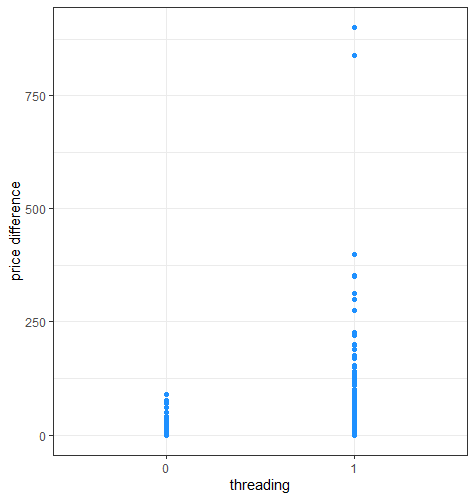

<br>

## 4. Modelling Approaches

The model needs to be able to predict two values. A minimum price and a maximum price. Because these values are numerical, not all models are suitable for this. In general, because of the two target variables, a decision must be made whether to work with one or two models. Below is a list of possible models that can be used. <br>

<b> Possible models : </b>
- **Single Target Regression Trees:** Using input variables to devide data and fit simple local models at each leaf node of the tree. Two regression trees can be used to predict the two targets. One tree to predict the minimum value and another to predict the maximum value. This model generalizes well in case of missing or new data by combining the leaf nodes.<br>


- **Multi Target Regression:**  A tree that is able to predict multiple continuous targets at once. A multi-target regression tree better identifies the dependencies between the different target variables than a single-target regression tree and is often smaller than the two single-target trees combined.<br>


- **Random Forest Multi Target Regression:** This model adds to the Multi Target Regression that a Random Forest is used. This is a booklet of many different trees for which the predictions are combined. This technique is much more robust against noice and prevents overfitting.


- **Multi Output Neural Networks:** An artificial neural network with two output nodes. One node for the minimum price and one for the maximum price.

After considering all above models, we have decided to use a Random Forest Multi Target Regression. The reasons for this choice, will be discussed in the next chapter. 



## 5. Random Forest Multi Target Regression vs Multi Output Neural Network


### Multi Output Neural Network

A Multi Output Neural Network has been considered. More specific, a feed forward Neural Network with one hidden layer and two output nodes. One for the minimum price and the other one for the maximum price. While testing the Multi Output Neural Network, we discovered that the results were way worse than our Random Forest Multi Target Regression model, so this model has been put aside.
<br>
XXXX Was het echt met 1 hidden layer. Er was toch getest met meerdere layers en meerdere nodes? --> wat er hier staat heeft bjorn mij doorgestuurd XXXX
<br>
### Random Forest Multi Target Regression

#### Multi Target Regression

When comparing building multiple single-target regression models or one multi-target regression model, multiple advantages for a multi-target regression model can be found. Assuming that the minimum and maximum price, the two predictions we are looking for, are strongly correlated -which is realistic- there is a strong tendency to prefer a multi-target regression model since this model takes into account the correlation between the outputs and will therefore give a more accurate model. 
Another advantage of a multi-target regression model is that it will produce a simpler model than two single-target regression models and will therefore also have a better computational efficiency.
Further, it is usually also easier to interpret one multi-target model than to interpret several different single-target models. 


#### Random Forest 

The performance of the model can be improved by using the random forest technique in order to make sure our model will not overfit on the training data. A random forest adds to bagging that in every node only a subset of features is used to choose a split. 
However, a random forest has the disadvantage that we will lose the interpretability of our single multi-target model because of the multiple trees that are built based on subsets of features. 


#### Measuring the MSAE

We have both measured the MSAE for predicting the minimum and maximum price and for predicting the minimum price and the price difference. Between those two results, no significant improvement is obtained.  This is as expected because the regression tree considers the two outputs, min and max price, at the same time. They are not considered independent and the splits are based on improving both outputs.
<br>
<br>

<i> Hieronder zou ik dus de code van het model zetten. Dus sowieso deel 4 tot 7 uit de notebook MTRT van Simon. deel 3 over feature importance moet hier dan misschien ook nog kort besproken worden, welke features we nu juist in ons model gestoken hebben? 

Deel 1 en 2 weet ik niet of we die ook hier willen, of dat we deel 2 over missing values niet beter onder het gedeelte over missing values zetten? Dit lijkt me overzichtelijker en 'luchtiger'. 
    
En Deel 6 over Visualisation of model and data, dat past misschien beter bij evaluation? </i>



### Random Forest Multi Target Regression: Python Code

#### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import math
import io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pydotplus

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
from sklearn.externals.six import StringIO
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from collections import defaultdict

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import seaborn as sns

## Edit Print options
desired_width = 500
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 600)

#### Dealing with missing values

In [ ]:
## Importing the preprocessed data
missing_values = ["n/a", "na", "--","NAN"," ","nan","NaN",""]
data = pd.read_csv('datafile2.csv',na_values = missing_values)
data2 = pd.read_csv('datafile2_test.csv',na_values = missing_values)

## Removing missing values
# data.dropna()

## Just a temporary dataset to test the capabilities of the model
temp_data = data[['id','brand','base_name','os_details','gpu_brand','cpu_brand','cpu_type_name','gpu_type','screen_surface','screen_size','pixels_x',
                  'touchscreen','discrete_gpu','gpu','ram','ssd','detachable_keyboard','weight','storage',
                  'cpu_benchmark','gpu_benchmark','cpu_GHZ','cpu_core','threading','pc_name','min_price','max_price']]

test_data = data2[['id','brand','base_name','os_details','gpu_brand','cpu_brand','cpu_type_name','gpu_type','screen_surface','screen_size','pixels_x',
                   'touchscreen','discrete_gpu','gpu','ram','ssd', 'detachable_keyboard','weight','storage',
                   'cpu_benchmark','gpu_benchmark','cpu_GHZ','cpu_core','threading','pc_name']]

concat_df = pd.concat([temp_data , test_data])
concat_df.to_csv("/Users/Simon/Documents/GitHub/adana123/concat_df1.csv",header=True,index=True)

##### TRAINING DATA #####
## Filling in missing values: CATEGORICAL & BINARY VARIABLES
detach_key = int(temp_data.loc[:,'detachable_keyboard'].mode())
temp_data.loc[:,'detachable_keyboard'] = temp_data.loc[:,'detachable_keyboard'].fillna(0)

temp_data.loc[:,'gpu_brand'] = temp_data.loc[:,'gpu_brand'].fillna("Unknown", inplace = False) 
temp_data['cpu_type_name'] = temp_data.apply(lambda row: row['cpu_brand'] if pd.isnull(row['cpu_type_name']) 
                                             else row['cpu_type_name'], axis=1)
temp_data['gpu_type'] = temp_data['gpu_type'].fillna("No GPU", inplace = False) 
temp_data.loc[:,'screen_surface'] = temp_data.loc[:,'screen_surface'].fillna("Unknown", inplace = False) 
temp_data['os_details'] = temp_data['os_details'].fillna("Unknown", inplace = False) 
temp_data['cpu_core'] = temp_data['cpu_core'].fillna(temp_data['cpu_core'].mode())

# ## Filling in missing values: NUMERICAL VARIABLES
temp_data['weight'] = temp_data['weight'].fillna(temp_data['weight'].mean())
temp_data['cpu_benchmark'] = temp_data['cpu_benchmark'].fillna(temp_data['cpu_benchmark'].mean()) 
temp_data['gpu_benchmark'] = temp_data['gpu_benchmark'].fillna(temp_data['gpu_benchmark'].mean())
temp_data['cpu_GHZ'] = temp_data['cpu_GHZ'].fillna(temp_data['cpu_GHZ'].mean())
pixel_mode = int(temp_data.loc[:,'pixels_x'].mode())
temp_data['pixels_x'] = temp_data['pixels_x'].fillna(pixel_mode) #Modus! Most frequent number! (median)

## Showing the data
# data.head()

########################################################################################################

##### TRAINING & TESTING DATA #####
## Filling in missing values: CATEGORICAL & BINARY VARIABLES
detach_key = int(temp_data.loc[:,'detachable_keyboard'].mode())
concat_df.loc[:,'detachable_keyboard'] = concat_df.loc[:,'detachable_keyboard'].fillna(detach_key)
# print(concat_df['detachable_keyboard'])
concat_df['gpu_brand'] = concat_df['gpu_brand'].fillna("Unknown", inplace = False) 
concat_df['cpu_type_name'] = concat_df.apply(lambda row: row['cpu_brand'] if pd.isnull(row['cpu_type_name']) 
                                             else row['cpu_type_name'], axis=1)

concat_df['gpu_type'] = concat_df['gpu_type'].fillna("No GPU", inplace = False)
concat_df['gpu'] = concat_df['gpu'].fillna("No GPU", inplace = False) 
concat_df['screen_surface'] = concat_df['screen_surface'].fillna("Unknown", inplace = False) 
concat_df['os_details'] = concat_df['os_details'].fillna("Unknown", inplace = False) 
concat_df['cpu_core'] = concat_df['cpu_core'].fillna(temp_data['cpu_core'].mode())

## Filling in missing values: NUMERICAL VARIABLES
concat_df['weight'] = concat_df['weight'].fillna(temp_data['weight'].mean())
concat_df['cpu_benchmark'] = concat_df['cpu_benchmark'].fillna(temp_data['cpu_benchmark'].mean()) 
concat_df['gpu_benchmark'] = concat_df['gpu_benchmark'].fillna(temp_data['gpu_benchmark'].mean())
concat_df['cpu_GHZ'] = concat_df['cpu_GHZ'].fillna(temp_data['cpu_GHZ'].mean())

pixel_mode = int(temp_data.loc[:,'pixels_x'].mode())
concat_df.loc[:,'pixels_x'] = concat_df.loc[:,'pixels_x'].fillna(pixel_mode)



temp_data.to_csv("/Users/Simon/Documents/GitHub/adana123/temp_data.csv",header=True,index=True)
concat_df.to_csv("/Users/Simon/Documents/GitHub/adana123/concat_df2.csv",header=True,index=True)


<i> XXX Code geeft ook een soort van error XXX </i>

#### Feature importance

<i>  XXX Moet hier dan misschien ook nog kort besproken worden, welke features we nu juist in ons model gestoken hebben? XXX </i>

#### Splitting Data & Fitting Data

In [ ]:
#### Training Data ####
## Seperating categorical - binary - numerical variables
X_cat = temp_data[['cpu_core','brand','cpu_brand','gpu','gpu_brand','cpu_type_name','screen_surface']]#,'gpu_type','os_details','base_name'
X_bin = temp_data[['touchscreen','discrete_gpu','detachable_keyboard','threading']]
X_num = temp_data[['id','screen_size','ram','ssd','storage','weight','cpu_GHZ','pixels_x','cpu_benchmark','gpu_benchmark']]#,'id']]

## Creating dummy variables:
X_cat_dummies = pd.get_dummies(X_cat, drop_first=True)

## Merging input data
Xa = pd.concat([X_cat_dummies,X_bin,X_num], axis=1)
Xb = pd.concat([X_cat,X_bin,X_num], axis=1)
# X = pd.concat([X_cat_dummies,X_num], axis=1)
# X = X_cat_dummies

## Defining output data
Ya = temp_data[['min_price','max_price']]
Yb = Ya
# Yb = temp_data[['min_price','diff_price']]

########################################################################################
## Seperating categorical - binary - numerical variables
X_cat_test = concat_df[['cpu_core','brand','cpu_brand','gpu_brand','gpu','cpu_type_name','screen_surface']]#'pc_name','gpu_type','os_details','base_name'
X_bin_test = concat_df[['touchscreen','discrete_gpu','detachable_keyboard','threading']]
X_num_test = concat_df[['screen_size','ram','ssd','storage','weight','cpu_GHZ','pixels_x','cpu_benchmark','gpu_benchmark']]

## Creating dummy variables:
X_cat_dummies_test = pd.get_dummies(X_cat_test, drop_first=True)

## Merging input data
X_full = pd.concat([X_cat_dummies_test,X_bin_test,X_num_test], axis=1)
X_train = X_full.head(len(data))
X_test = X_full.tail(len(data2))

########################################################################################
## Splitting the dataset into train and test sets
# Predict Minimum and Maximum prices
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(Xa, Ya, test_size=0.3, random_state=42)


#Split without creating dummies for easy analysis
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(Xb, Yb, test_size=0.3, random_state=42)

trainingdata = pd.concat([X_train_b, Y_train_b], axis=1, sort=False)
testingdata = pd.concat([X_test_b, Y_test_b], axis=1, sort=False)

trainingdata.to_csv("/Users/Simon/Documents/GitHub/adana123/trainingdata.csv",header=True,index=True)
testingdata.to_csv("/Users/Simon/Documents/GitHub/adana123/testingdata.csv",header=True,index=True)


## 2 models
del X_train_a['id'] #need to delete a useless feature first
del X_test_a['id']

Model1 = RandomForestRegressor(n_estimators = 400,criterion='mae',random_state = 42)
Model1.fit(X_train_a,Y_train_a)

# Model2 = RandomForestRegressor(n_estimators = 200,criterion='mae',random_state = 0)
# Model2.fit(X_train_b,Y_train_b)

<i> XXX Geeft ook een error XXX </i>

#### Measuring mean summed absolute error

##### MSAE for predicting minimum and maximum  price

In [ ]:
## Predicting the target values
Y_pred = Model1.predict(X_test_a)

## Calculating the score
MAE = mean_absolute_error(Y_test_a, Y_pred, multioutput='raw_values')
print(MAE[0]+MAE[1])

## Turn DF to array
Y_test_array = Y_test_a.to_numpy()

Sum_error = 0
Test_Results = []

for i in range(len(Y_pred)):
    
    temp_test_results = []
    
#     Y_id = X_test_b['id'][i]
    Y_pred_min = Y_pred[i][0]
    Y_pred_max = Y_pred[i][1]
    Y_test_min = Y_test_array[i][0]
    Y_test_max = Y_test_array[i][1]
    
    temp_test_results = [Y_pred_min,Y_test_min,Y_pred_max,Y_test_max]
    Test_Results.append(temp_test_results)
    
    Error_min = abs(Y_pred_min - Y_test_min)
    Error_max = abs(Y_pred_max - Y_test_max)
    Total_error = Error_min + Error_max
    
    Sum_error = Sum_error + Total_error
    counter = i

Avg_error = Sum_error / counter
MSAE = Avg_error
print(MSAE)

In [ ]:
# Array --> Datafame
Test_Results = pd.DataFrame(Test_Results,columns=['pred_min_price','act_min_price','pred_max_price','act_max_price'])

# Reset Indexes of DF
X_test_b.reset_index(inplace=True) 
Test_Results.reset_index(inplace=True,drop=True) 

# Copy the ID column
Test_Results.loc[:,'id'] = X_test_b.loc[:,'id']

# Set ID as new Index
X_test_b.set_index('id')
Test_Results.set_index('id')

# Merge the features with the results
testingdata_results = X_test_b.merge(Test_Results, left_index=True, right_index=True)
# testingdata_results = pd.concat([X_test_b, Test_Results], axis=1, sort=False)
# testingdata_results.drop(['id_x'],axis=1)
# testingdata_results.drop(['id_y'],axis=1)
testingdata_results.to_csv("/Users/Simon/Documents/GitHub/adana123/testingdata_results.csv",header=True,index=True)
testingdata_results.head(len(testingdata_results))

##### MSAE for predicting minimum price and price difference

In [ ]:
# Y_pred = Model2.predict(X_test_b)

# ## Turn DF to array
# Y_test_array = Y_test_b.to_numpy()

# Sum_error = 0
# Y_pred_min_array = []
# for i in range(len(Y_pred)):
# #     print(Y_pred[i],Y_test_array[i])
#     Y_pred_min = Y_pred[i][0]
#     Y_pred_max = Y_pred_min + Y_pred[i][1]
#     Y_test_min = Y_test_array[i][0]
#     Y_test_max = Y_test_min + Y_test_array[i][1]
    
#     Y_pred_min_array.append(Y_pred_min)
    
#     Error_min = abs(Y_pred_min - Y_test_min)
#     Error_max = abs(Y_pred_max - Y_test_max)
#     Total_error = Error_min + Error_max
    
#     Sum_error = Sum_error + Total_error
#     counter = i

# Avg_error = Sum_error / counter
# MSAE = Avg_error
# print('The MSAE = ', round(MSAE,3))



<i> XXX alles staat hier tussen ###, mogen die hekjes weg? XXX </i>

<i> XXX Wat met puntje 6 en 7? XXX </i>

## 6. Validation of the Model

### Random Forest Tuning

The code and graph below show that the Random Forest Regressor does not suffer from model overfitting in terms of hyperparameters. By increasing the number of estimators, the model simply converges to a constant mean summed absolute error. It is also important to note that the deviation from the convergence value of the MSAE decreases as the number of trees increase. The model becomes less irradic and more robust in its predictions as the number of trees increases. This is logical since for a single prediction of the price an average is taken with a length of the number of trees. This makes tuning very easy. The model just requires enough trees. It is not possible to overfit the model by increasing the number of trees. 

In [1]:
def estimator_tuning(max_trees,X_train_a, Y_train_a, X_test_a, Y_test_a):

    RF1 = RandomForestRegressor(n_estimators=1) #,criterion='mae',random_state = 42)
    trees, train_loss, test_loss = [], [], []
    
    for iter in range(max_trees):
        RF1.fit(X_train_a,Y_train_a)
        Y_train_predicted = RF1.predict(X_train_a)
        Y_test_predicted = RF1.predict(X_test_a)

        MAE_train = mean_absolute_error(Y_train_a, Y_train_predicted, multioutput='raw_values')
        MAE_test = mean_absolute_error(Y_test_a, Y_test_predicted, multioutput='raw_values')
        MSAE_train = MAE_train[0]+MAE_train[1]
        MSAE_test = MAE_test[0]+MAE_test[1]

#         print("Iteration: {} Train msae: {} Test msae: {}".format(iter, MSAE_train, MSAE_test))

        trees += [RF1.n_estimators]
        train_loss += [MSAE_train]
        test_loss += [MSAE_test]
        RF1.n_estimators += 1   
        
    return trees, train_loss, test_loss

trees, train_loss, test_loss = estimator_tuning(100,X_train_a, Y_train_a, X_test_a, Y_test_a)

plt.figure(figsize=(12,10))  
plt.plot(trees, train_loss, color="blue", label="MSAE on Train data")
plt.plot(trees, test_loss, color="red", label="MSAE on Test data")
plt.xlabel("# of trees")
plt.ylabel("Mean Summed Absolute Error");
plt.legend()


NameError: name 'X_train_a' is not defined

### Input Feature Tuning

It is also important to note the effect of specific standard and engineered features on the models accuracy. In this section the effect of a feature in the model is quantified. We quantify the effect of a feature via the adjusted coefficient of determination (adjusted $r^2$). First, the function for this metric is defined. Next, through cross-validation and shuffling of the features a mean adjusted $r^2$ score is calculated for every feature. By splitting the data randomly a number of times, it is possible to fairly accuratly approach the true $r^2$ values. There is however a catch: the features might still be correlated with eachother. In the data exploration, obvious correlations between features have already been determined and only one of the correlated features was included. 

An obvious example is x_pixels vs y_pixels. Whenever the number of pixels in the x-direction changes, usually so does the number of pixels in the y-direction and therefore it suffices the only include one of the two features. If the other feature were included than this would show a very low adjusted $r^2$ value. 

In [2]:
## A function for calculating the adjusted coefficient of determination
def adj_r2_score(clf, X, y):
    """Calculate the adjusted :math:`R^2` of the model.

    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].

    Returns
    -------
    float
        The adjusted :math:`R^2` of the model.
    """
    n = X.shape[0]  # Number of observations
    p = X.shape[1]  # Number of features
    r_squared = r2_score(y, clf.predict(X))
    acc = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1)) 
    return acc

In [ ]:
X_cat = temp_data[['cpu_core','brand','cpu_brand','gpu_brand','cpu_type_name','screen_surface']]#,'gpu','gpu_type','os_details','base_name'
X_bin = temp_data[['touchscreen','discrete_gpu','detachable_keyboard','threading']]
X_num = temp_data[['screen_size','ram','ssd','storage','weight','cpu_GHZ','pixels_x','cpu_benchmark','gpu_benchmark']]#,'id']]

## Creating dummy variables:
X_cat_dummies = pd.get_dummies(X_cat, drop_first=True)

## Merging input data
Xa = pd.concat([X_cat_dummies,X_bin,X_num], axis=1)

def feature_ranking(names_x,Xa,Ya):
    #crossvalidate the scores on a number of different random splits of the data
    RF2 = RandomForestRegressor(n_estimators = 100,criterion='mae')#,random_state = 42)
    scores = defaultdict(list)


    for a in range(50):
#         RF2 = RandomForestRegressor(n_estimators = 300)#,random_state = 42)
        X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(Xa, Ya, test_size=0.3)
        r = RF2.fit(X_train_a, Y_train_a)
#         acc = r2_score(Y_test_a, RF2.predict(X_test_a)) 
        acc = adj_r2_score(RF2,X_test_a,Y_test_a)
        
        for b in range(Xa.shape[1]):
            X_t = X_test_a.copy()
            np.random.shuffle(X_t[:, b])
#             shuff_acc = r2_score(Y_test_a, RF2.predict(X_t))
            shuff_acc = adj_r2_score(RF2,X_t,Y_test_a) 
            scores[names_x[b]].append((acc-shuff_acc)/acc)
            
            sorted_scores = sorted([(round(np.mean(score), 4), feat) for
                  feat, score in scores.items()], reverse=True)
            
    return sorted_scores

X_array = Xa.to_numpy()
Y_array = Ya.to_numpy()
names_x = list(Xa.columns.values)
names_y = list(Ya.columns.values)
names = names_x + names_y

sorted_scores = feature_ranking(names_x,X_array,Y_array)
print(sorted_scores)

In [3]:
print(sorted_scores[0][0])

NameError: name 'sorted_scores' is not defined

In [4]:
# Visualizing adjusted coefficient of determination
labels = []
r_score = []
top_features = 15

for a in range(top_features):
    r_score.append(sorted_scores[a][0])
    labels.append(sorted_scores[a][1])
    
print(labels)
print(r_score)

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(14,8))
rects1 = ax.bar(x - width/2, r_score, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Adjusted Coefficient of Determination')
ax.set_title('Top ' + str(top_features) + ' Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
# autolabel(rects2)

# fig.tight_layout()
plt.xticks(rotation=50)
plt.show()

NameError: name 'sorted_scores' is not defined

<i> XXX De grafieken van simon zijn document, verschijnen hier niet, omdat die verwijzen naar dingen op simon zijn laptop. Hoe gaan we dit oplossen in dees document? </i>

## 6. Model Evaluation 

### scatterplot

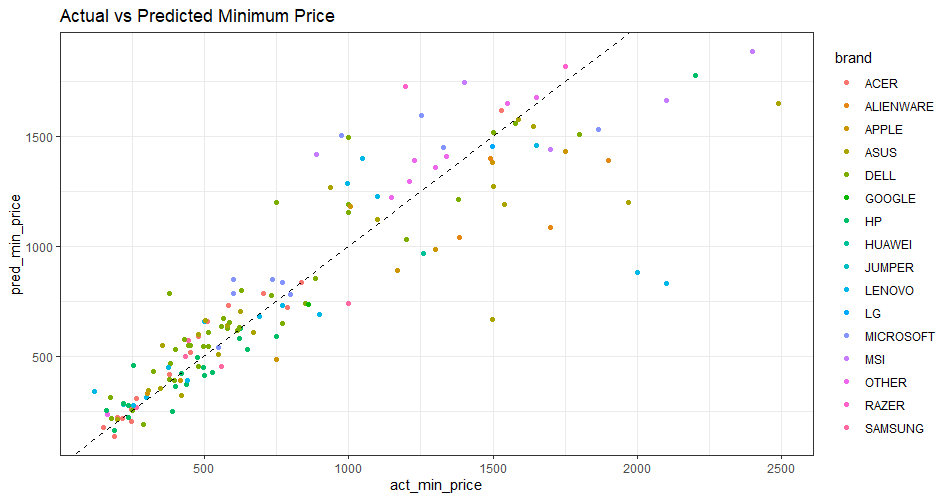

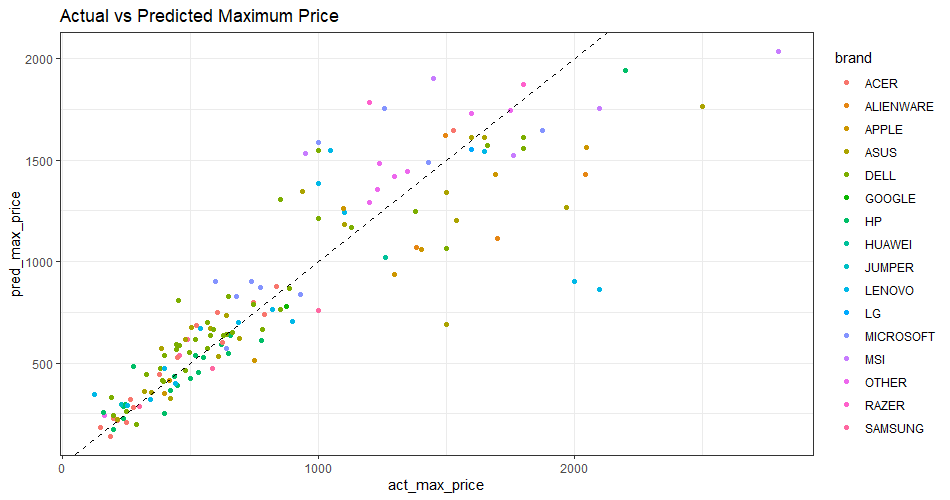

The two scatter plots show many similarities. In both cases, the difficulties lie with predicting the more expensive laptops. The prediction error increases more than proportionally. Very often both the minimum and the maximum price of these computer gets over- or underestimated.

In this scatter plot, you will find the MSAE of every instance. The dotted line is the reference line of the total MSAE = 310 achieved on the validation set. Preferrably all dots will be as low as possible. As in the previous plots it is clear that larger mistakes are made in the more expensive range of laptops. The five largest mistakes are two Lenovo's and three ASUS's.
<br>
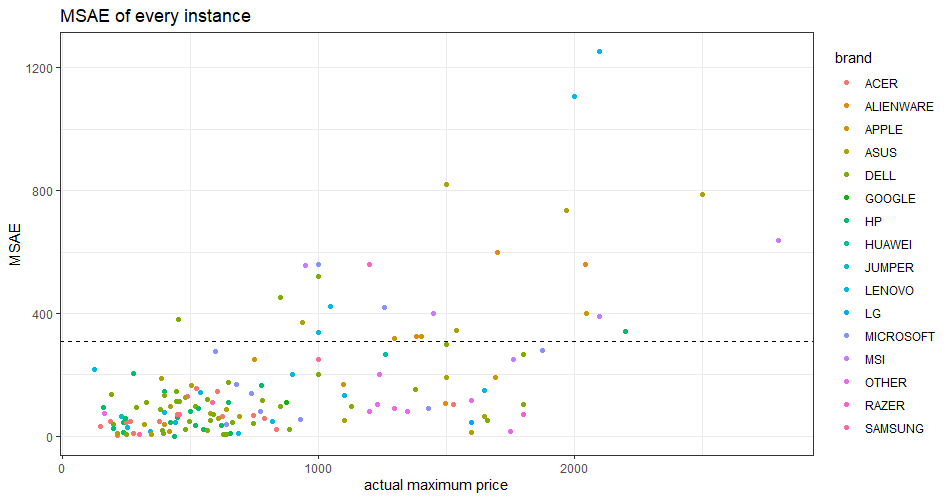

It is very difficult to pinpoint why the laptops were underestimated because they seem overly expensive. For the Lenovo's one laptop has a Xeon processor, a processor more common in a business context. All the CPU features were trained for the typical consumer market and might therefore all be a bad indication for the real value of the Xeon processor. The other one seems to be a business computer as well according to the description. This could mean the laptop comes with certain security or docking features oriented towards businesses which are unobserved in the data set. Another thing to note is that Lenovo is a brand that usually is on the cheaper side of the market. Also from this point of view the two laptops are clearly outliers. Something similar might have happened with the ASUS laptops. Although the observed features are not extraordinary, the description indicated they are special editions with a fingerprint sensor, outstanding speakers, very slim rims around the screen or titanium gold edition. In conclusion, it seems there is not much that can be done to overcome these mistakes. These laptops are exceptional and therefore, bring along bad estimates.


## 7. Hidden Leaderboard

In [8]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
mydata2= pd.read_csv('Private_LB_Results.csv')
df2 = pd.DataFrame(mydata2)
df2.head()

,Unnamed: 0,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,act_min_price,act_max_price,index,pred_min_price,pred_max_price
0,0,27414,"2019 Newest Lenovo IdeaPad 15.6"" HD High Perfo...",Lenovo,Lenovo Ideapad 130,15.6,1366.0,768.0,Matte,0,AMD A9,AMD A9-9425 3.1 GHz (7th gen Stoney Ridge Dual...,0.0,0,AMD Radeon R5,Windows,Windows 10 Home,4,128,128,4.63,260.60,267.15,216,283.945353,295.879227
1,1,25055,Lenovo Chromebook C330 2-in-1 Convertible Lapt...,Lenovo,Lenovo Chromebook C330,11.6,1366.0,768.0,Glossy,1,MediaTek,MediaTek MT8173C 2.1 GHz (Quad-Core),0.0,0,PowerVR GX6250,Chrome OS,Chrome OS,4,64,64,2.64,239.39,259.99,197,353.980810,363.212627
2,2,16241,"Model HP Spectre x360 - 13t Stylus(16GB RAM, 5...",HP,HP Spectre x360-13t,13.3,1920.0,1080.0,Glossy,1,Intel Core i7,Intel Core i7-7500U 2.7 GHz (7th gen Kaby Lake...,0.0,0,Intel HD 620,Windows,Windows 10,16,512,512,2.89,1299.95,1299.95,172,1310.299823,1345.263803
3,3,29841,"New Apple MacBook Pro (16-Inch, 16GB RAM, 512G...",Apple,Apple MacBook Pro (2019),16.0,3072.0,1920.0,Glossy,0,Intel Core i7,Intel Core i7-9750H 2.6 GHz (9th gen Coffee La...,0.0,1,AMD Radeon Pro 5300M,macOS,macOS Catalina,16,512,512,4.30,2182.92,2230.16,182,1438.452040,1567.075463
4,4,29849,"Dell Latitude E5420 Laptop, HDMI, Intel Core i...",Dell,Dell Latitude E5420,14.0,NaN,NaN,Matte,0,Intel Core i3,Intel Core i3-2310M 2.1 GHz (Sandy Bridge Dual...,0.0,0,Intel HD 3000,Windows,Windows 10 Home,4,0,160,4.50,187.90,195.88,202,285.935533,305.466367


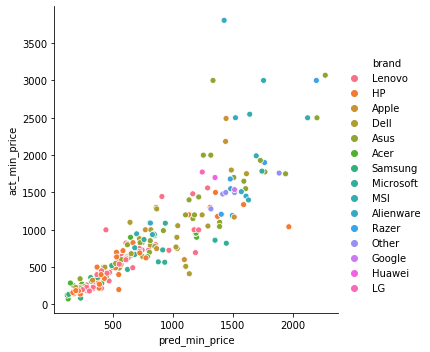

In [10]:
sns.relplot(x='pred_min_price',y='act_min_price',hue='brand',data=df2)

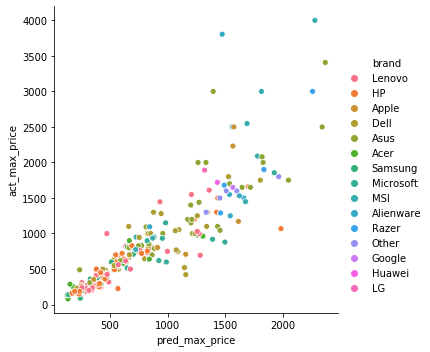

In [11]:
sns.relplot(x='pred_max_price',y='act_max_price',hue='brand',data=df2)